In [61]:
import pandas as pd
import seaborn as sns
models_df = pd.read_csv("eval_df.csv", index_col=0)
models_df.head()
models_df['model_name'].unique()
colors = sns.color_palette("tab10", len(models_df['model_name'].unique())+1)

In [73]:
df_xb = pd.read_csv("xbresson_train.csv")
df_xb['epoch'] = df_xb['epoch'] + 1

Index(['epoch', ' duration', ' L_train', ' L_base', ' L_test', ' gap_train',
       ' update_baseline'],
      dtype='object')

In [62]:
grouped_by_epoch_cost = models_df.groupby(['model_name', 'epoch']).mean().reset_index().drop(columns=['iter'])
grouped_by_epoch_cost['epoch'] = grouped_by_epoch_cost['epoch']+1
grouped_by_epoch_cost

,model_name,epoch,cost
0,BaseModel,1,6.704140
1,BaseModel,2,6.687552
2,BaseModel,3,6.635931
3,BaseModel,4,6.650387
4,BaseModel,5,6.666680
5,BaseModel,6,6.634003
6,BaseModel,7,6.588201
7,BaseModel,8,6.637807
8,BaseModel,9,6.639063
9,BaseModel,10,6.584771


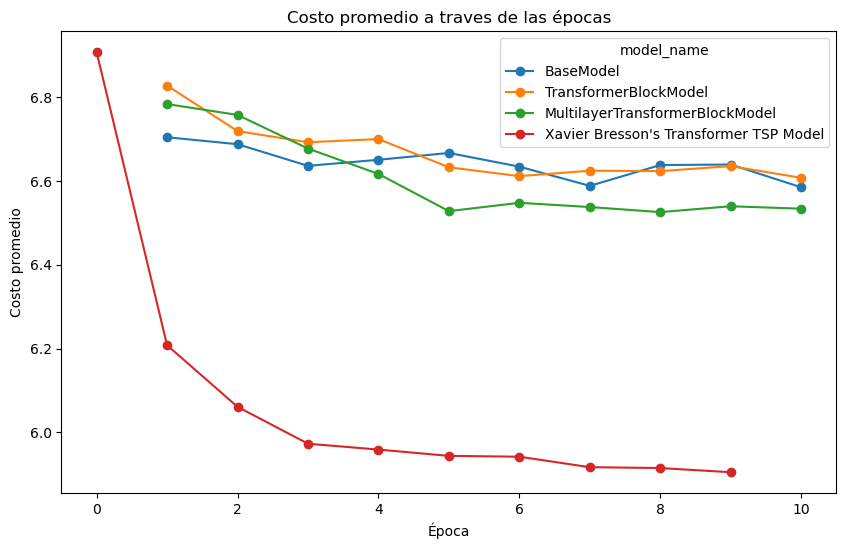

In [75]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(10, 6))
for name, color in zip(models_df['model_name'].unique(), colors):
        model_data=grouped_by_epoch_cost[grouped_by_epoch_cost['model_name'] == name]
        ax.plot(
            model_data['epoch'],
            model_data['cost'],
            color = color,
            marker='o',
            label=name,
        )
ax.plot(df_xb['epoch'], df_xb[' L_test'], color=colors[-1], label="Xavier Bresson's Transformer TSP Model", marker='o')
ax.set_title("Costo promedio a traves de las épocas")
ax.set_xlabel("Época")
ax.set_ylabel("Costo promedio")
ax.legend(title="model_name")
plt.show()
        